In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tabulate import tabulate
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv ('datasets\ecommerce_sales_analysis.csv')

In [3]:
df.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [39]:
df.iloc[:,1:10]

,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4
0,Product_1,Clothing,190.40,1.7,220,479,449,92,784
1,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863
2,Product_3,Toys,367.34,4.5,163,348,558,567,143
3,Product_4,Toys,301.34,3.9,951,725,678,59,15
4,Product_5,Books,82.23,4.2,220,682,451,649,301
...,...,...,...,...,...,...,...,...,...
995,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787
996,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78
997,Product_998,Sports,72.73,1.3,287,725,109,193,657
998,Product_999,Sports,475.37,1.2,720,196,191,315,622


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [5]:
df.describe()

,product_id,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,247.677130,3.027600,526.506000,498.306000,507.661000,506.739000,503.823000,487.194000,491.653000,507.011000,504.569000,491.934000,514.798000,505.83800,500.386000
std,288.819436,144.607983,1.171243,282.269932,289.941478,285.992689,294.010873,286.645567,287.844324,289.234018,291.047287,289.945691,287.514731,288.710119,288.82451,278.509459
min,1.000000,7.290000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.00000,4.000000
25%,250.750000,121.810000,2.000000,283.750000,245.500000,262.500000,243.750000,261.500000,221.000000,236.000000,254.000000,240.500000,247.250000,267.000000,251.25000,259.000000
50%,500.500000,250.920000,3.100000,543.000000,507.500000,508.000000,493.000000,501.500000,497.000000,479.500000,522.500000,499.500000,495.500000,532.000000,502.00000,500.500000
75%,750.250000,373.435000,4.000000,772.000000,740.750000,756.250000,777.250000,749.500000,727.000000,740.500000,757.250000,762.250000,735.250000,770.250000,761.00000,730.000000
max,1000.000000,499.860000,5.000000,999.000000,1000.000000,1000.000000,999.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000


In [6]:
df.isnull().sum()

product_id        0
product_name      0
category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64

In [7]:
df['total_sales'] = df.iloc[:, 6:18].sum(axis=1)
df['total_sales']


0      6421
1      6027
2      5580
3      5022
4      6094
       ... 
995    5515
996    4511
997    5527
998    4546
999    7486
Name: total_sales, Length: 1000, dtype: int64

In [8]:
df.head(2)

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales
0,1,Product_1,Clothing,190.4,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421
1,2,Product_2,Home & Kitchen,475.6,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027


In [9]:
category_sales = df.groupby('category')['total_sales'].sum().reset_index()
category_sales

,category,total_sales
0,Books,938229
1,Clothing,826536
2,Electronics,845120
3,Health,834414
4,Home & Kitchen,742141
5,Sports,916371
6,Toys,917101


In [10]:
df.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094


In [42]:
monthly_sales = df.groupby('category').sum().iloc[:, 5:17].reset_index()
monthly_sales

,category,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,Books,77932,80079,76998,74699,79051,76644,79114,78108,77211,83504,76557,78332
1,Clothing,60966,67911,76796,70088,61643,63123,66105,74422,72675,68806,71683,72318
2,Electronics,76347,72472,70708,73158,72169,70060,72223,65754,69914,70148,68148,64019
3,Health,67644,67432,67602,72925,69178,63926,75256,69126,64581,72613,72500,71631
4,Home & Kitchen,57844,57252,62667,65388,59766,63169,60129,65042,58135,64876,66281,61592
5,Sports,77737,82244,75109,74287,73467,75641,77082,73912,79209,80187,74270,73226
6,Toys,79836,80271,76859,73278,71920,79090,77102,78205,70209,74664,76399,79268


In [12]:
max_sales_value = category_sales['total_sales'].max()
min_sales_value = category_sales['total_sales'].min()
print(max_sales_value)
print(min_sales_value)

938229
742141


In [13]:
max_sales_category = category_sales.loc[category_sales['total_sales'] == max_sales_value, 'category'].values[0]
min_sales_category = category_sales.loc[category_sales['total_sales'] == min_sales_value, 'category'].values[0]
print(max_sales_category)
print(min_sales_category)

Books
Home & Kitchen


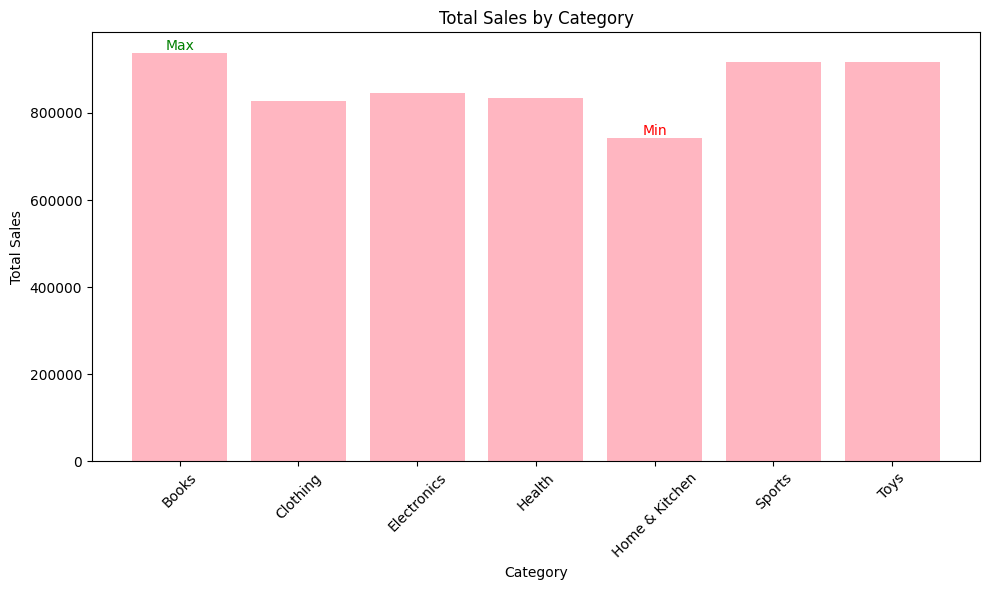

In [14]:
plt.figure(figsize=(10, 6))
bars = plt.bar(category_sales['category'], category_sales['total_sales'], color='lightpink')

for bar in bars:
    height = bar.get_height()
    if height == max_sales_value:
        plt.text(bar.get_x() + bar.get_width() / 2 , height, 'Max', ha='center', va='bottom', fontsize=10, color='green')
    elif height == min_sales_value:
        plt.text(bar.get_x() + bar.get_width() / 2 , height, 'Min', ha='center', va='bottom', fontsize=10, color='red')



plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

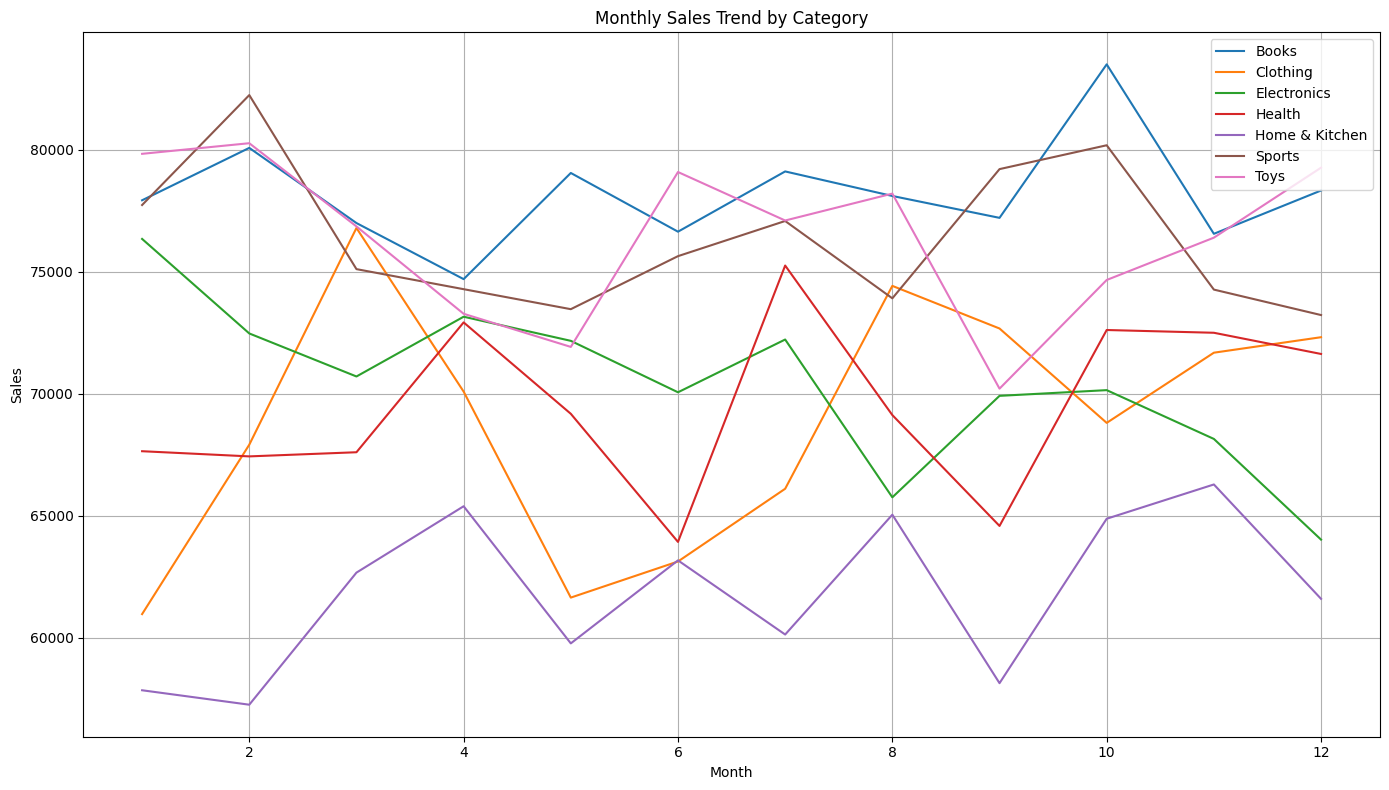

In [15]:
plt.figure(figsize=(14, 8))
for category in monthly_sales['category']:
    plt.plot(range(1, 13), monthly_sales[monthly_sales['category'] == category].iloc[0, 1:], label=category)

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend by Category')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
total_monthly_sales = df.iloc[:, 6:18].sum()
total_monthly_sales


sales_month_1     498306
sales_month_2     507661
sales_month_3     506739
sales_month_4     503823
sales_month_5     487194
sales_month_6     491653
sales_month_7     507011
sales_month_8     504569
sales_month_9     491934
sales_month_10    514798
sales_month_11    505838
sales_month_12    500386
dtype: int64

In [17]:
max_sales_month = total_monthly_sales.idxmax()
max_sales_value = total_monthly_sales.max()
print(max_sales_month)
print(max_sales_value)

sales_month_10
514798


In [18]:
min

<function min>

In [19]:
min_sales_month = total_monthly_sales.idxmin()
min_sales_value = total_monthly_sales.min()
print(min_sales_month)
print(min_sales_value)

sales_month_5
487194


In [20]:
print(f"Maximum sales month is: {max_sales_month} with monthly value with {max_sales_value}")
print(f"Minimum sales month is: {min_sales_month} with monthly value with {min_sales_value}")

Maximum sales month is: sales_month_10 with monthly value with 514798
Minimum sales month is: sales_month_5 with monthly value with 487194


In [21]:
mean_sales = total_monthly_sales.mean()

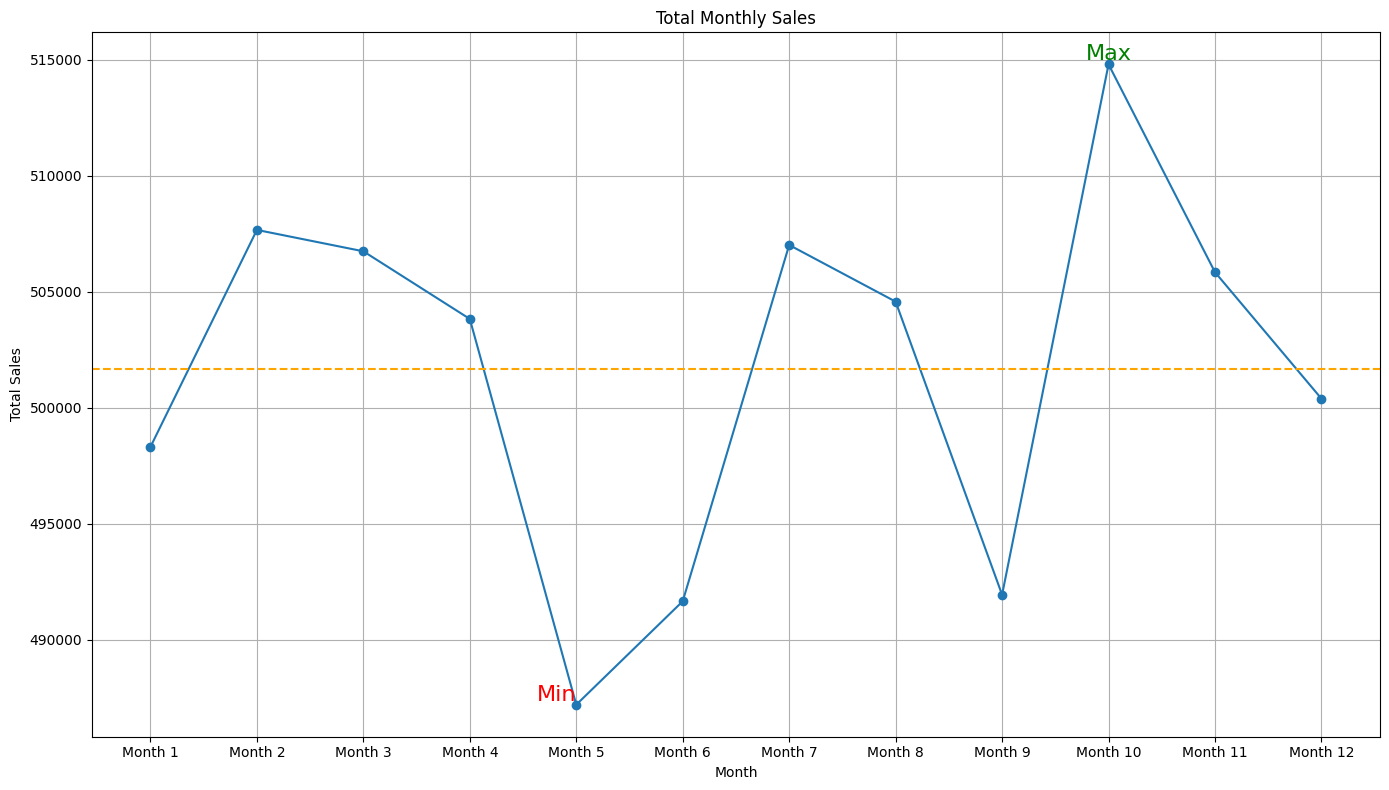

In [22]:
plt.figure(figsize=(14, 8))
plt.plot(range(1, 13), total_monthly_sales, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Monthly Sales')
plt.xticks(range(1, 13), [f'Month {i}' for i in range(1, 13)])
plt.grid(True)

plt.text(int(max_sales_month.split('_')[-1]), max_sales_value, 'Max', ha='center', va='bottom', fontsize=16, color='green')
plt.text(int(min_sales_month.split('_')[-1]), min_sales_value, 'Min', ha='right', va='bottom', fontsize=16, color='red')

plt.axhline(mean_sales, color='orange', linestyle='--')

plt.tight_layout()
plt.show()

In [23]:
category_review_score = df.groupby('category')['review_score'].mean()
category_review_score

category
Books             3.096753
Clothing          2.952143
Electronics       3.143478
Health            3.005036
Home & Kitchen    3.035200
Sports            3.091503
Toys              2.870861
Name: review_score, dtype: float64

In [24]:
max_category_review_score = category_review_score.idxmax()
max_category_review_score_value = category_review_score.max()
print(max_category_review_score)
print(max_category_review_score_value)

Electronics
3.1434782608695655


In [25]:
min_category_review_score = category_review_score.idxmin()
min_category_review_score_value = category_review_score.min()
print(min_category_review_score)
print(min_category_review_score_value)

Toys
2.870860927152318


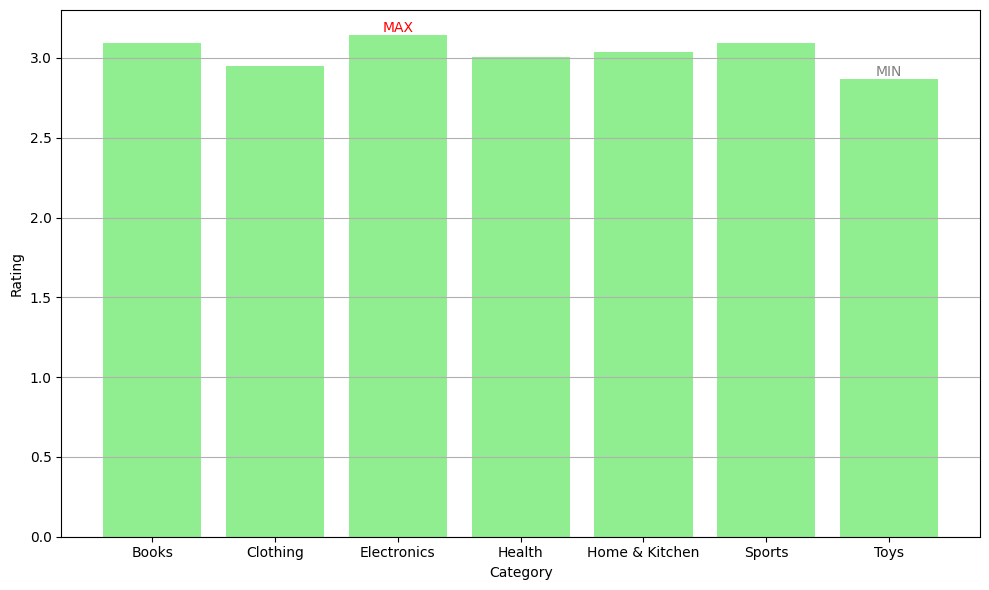

In [26]:
plt.figure(figsize=(10,6))

bars = plt.bar(category_sales['category'],category_review_score, color='lightGreen')
for bar in bars:
    height = bar.get_height()
    if height == max_category_review_score_value:
        plt.text(bar.get_x() + bar.get_width() / 2 , height, 'MAX', ha='center', va='bottom', fontsize=10, color = 'red')
       
    elif height == min_category_review_score_value:
        plt.text(bar.get_x() + bar.get_width() / 2 , height, 'MIN', ha='center', va='bottom', color = 'grey')

plt.xlabel('Category')
plt.ylabel('Rating')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [27]:
df['weighted_review_score'] = df['review_score'] * df['review_count']
most_fav_product = df.loc[df['weighted_review_score'].idxmax()]
most_fav_product


product_id                       12
product_name             Product_12
category                     Health
price                        485.11
review_score                    5.0
review_count                    991
sales_month_1                   276
sales_month_2                   214
sales_month_3                   991
sales_month_4                   906
sales_month_5                   495
sales_month_6                   374
sales_month_7                   962
sales_month_8                   100
sales_month_9                   201
sales_month_10                  819
sales_month_11                  491
sales_month_12                  132
total_sales                    5961
weighted_review_score        4955.0
Name: 11, dtype: object

In [28]:
most_reviewed_product = df.loc[df['review_count'].idxmax()]
most_reviewed_product

product_id                       903
product_name             Product_903
category                      Sports
price                          94.81
review_score                     4.0
review_count                     999
sales_month_1                    913
sales_month_2                    537
sales_month_3                    227
sales_month_4                     74
sales_month_5                    386
sales_month_6                    132
sales_month_7                    329
sales_month_8                    480
sales_month_9                    697
sales_month_10                   481
sales_month_11                    41
sales_month_12                   258
total_sales                     4555
weighted_review_score         3996.0
Name: 902, dtype: object

In [29]:
category_stats = df.groupby('category').agg(ave_review_score = ('review_score','mean'), total_review_count = ('review_count','sum'))
category_stats

,ave_review_score,total_review_count
category,,
Books,3.096753,79263
Clothing,2.952143,70347
Electronics,3.143478,73862
Health,3.005036,72398
Home & Kitchen,3.035200,67735
Sports,3.091503,83726
Toys,2.870861,79175


In [30]:
most_fav_category = category_stats.loc[category_stats['ave_review_score'].idxmax()]
most_fav_category

ave_review_score          3.143478
total_review_count    73862.000000
Name: Electronics, dtype: float64

In [31]:
print(f'Most favourite product is {most_fav_product['product_name']} and category name is {most_fav_product['category']}')
print(f'Most reviewed product is {most_reviewed_product['product_name']} and category name is {most_reviewed_product['category']}')
print(f'Most favourite category name is {most_fav_category.name}')

Most favourite product is Product_12 and category name is Health
Most reviewed product is Product_903 and category name is Sports
Most favourite category name is Electronics


In [32]:
df.head(2)[['category', 'sales_month_2']].values[1]

array(['Home & Kitchen', 989], dtype=object)